In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.animation import PillowWriter
from astropy import constants as const
import astropy.units as u

from calculating_velocity import binary_perast_vel

In [36]:
G = const.G.cgs.value
AU = const.au.cgs.value
M_sun = const.M_sun.cgs.value
daysec = 24.0*60*60

P = 2895
e = 0.8993
m1 = 10.31
m2 = 29.27 

In [37]:
v1, v2, x1, x2, axes1, axes2 = binary_perast_vel(e, P, m1, m2)

v1 = v1.value
v2 = v2.value
x1 = x1.value
x2 = x2.value

print(v1, v2, x1, x2)


16350485.091433516 -5759258.670744089 15092476415522.402 -5316140479809.905


In [38]:
Ma = m1 * M_sun
Mb = m2 * M_sun

gravconst = G*Ma*Mb

In [39]:
#WR
xa = -1.347832e+14
ya = -6.554545e+13

xva = 3760780.429010274
yva = 0

#O star
xb = 4.747572e+13
yb = 2.308758e+13

xvb = -1324688.9724323621
yvb = 0

In [6]:
# #WR
# xa = x1
# ya = 0

# xva = 0
# yva = v1

# #O star
# xb = x2
# yb = 0

# xvb = 0
# yvb = v2

In [40]:
t = 0.0
dt = 0.001*daysec


xalist = []
yalist = []

xblist = []
yblist = []

vxalist = []
vyalist = []

vxblist = []
vyblist = []

tlist = []

while t < P/4.7 * daysec:
    #Compute force
    rx = xb-xa
    ry = yb-ya

    modr3 = (rx**2 + ry**2)**1.5

    fx = -gravconst * rx/modr3
    fy = -gravconst * ry/modr3

    # Update the quantities

    xvb += fx*dt/Mb
    yvb += fy*dt/Mb
 

    xb += xvb*dt
    yb += yvb*dt


    xva += -fx*dt/Ma
    yva += -fy*dt/Ma

    xa += xva*dt
    ya += yva*dt

    tlist.append(t)
    t += dt

    xalist.append(xa)
    yalist.append(ya)

    xblist.append(xb)
    yblist.append(yb)

    vxalist.append(xva)
    vyalist.append(yva)

    vxblist.append(xvb)
    vyblist.append(yvb)

In [8]:

# index_list = []

# for i in range(len(vyalist)-1):
#     index = vyalist[i+1] * vyalist[i] 
#     if index < 0:
#         index_list.append(i)

# print(index_list)


[616787, 2885633]


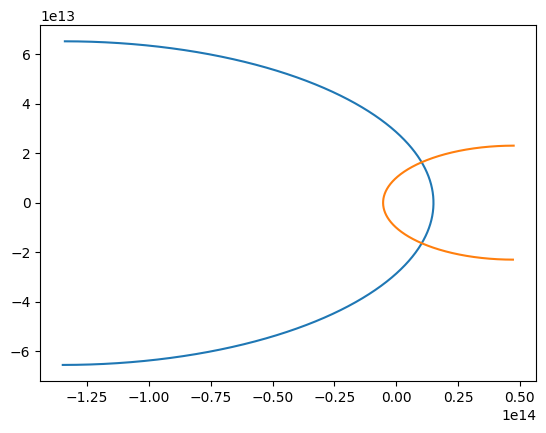

In [41]:
fig, ax = plt.subplots()
ax.plot(xalist, yalist)
ax.plot(xblist, yblist)
# plt.scatter(xalist[index_list[0]], yalist[index_list[0]])
# plt.scatter(xalist[index_list[1]], yalist[index_list[1]])
ax.set_aspect(aspect=1)
plt.show()

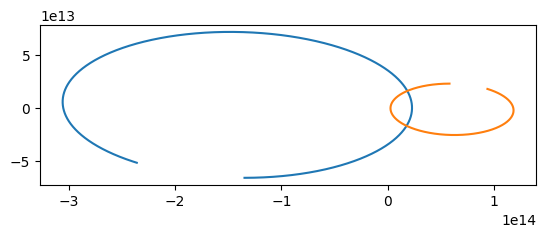

In [89]:
# fig, ax = plt.subplots()
# ax.plot(xalist, yalist)
# ax.plot(xblist, yblist)
# # plt.scatter(xalist[index_list[0]], yalist[index_list[0]])
# # plt.scatter(xalist[index_list[1]], yalist[index_list[1]])
# ax.set_aspect(aspect=1)
# plt.show()

In [113]:
print(f"vx1: {vxalist[index_list[1]]:e}")
print(f"vx2: {vxblist[index_list[1]]:e}")

# print(axes1, axes2)

print(f"x1: {-(axes1[0].value-x1):e}",f"y1: {-axes1[1].value:e}")
print(f"x2: {(axes2[0].value+x2):e}",f"y1: {axes2[1].value:e}")

vx1: 3.760780e+06
vx2: -1.324689e+06
x1: -1.347832e+14 y1: -6.554545e+13
x2: 4.747572e+13 y1: 2.308758e+13


In [114]:
def animate(i):
    ln1.set_data([xalist[::160][i], xblist[::160][i]], [yalist[::160][i], yblist[::160][i]])
    text.set_text('Time = {:.2f} Years'.format((tlist[::160][i])/(daysec*365)))

fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_title("Orbital Motion of WR140")
ax.plot(xalist, yalist, ls = "--", color="k")
ax.plot(xblist, yblist, ls = "--", color="k")
ln1, = plt.plot([], [], 'o', lw=3, markersize=16, color="yellow")
text = plt.text(0, 1e14, '')
ax.set_ylim(-2e14, 2e14)
ax.set_xlim(-1.5e14, 3.5e14)
ani = animation.FuncAnimation(fig, animate, frames=(len(xalist[::160])-1), interval=5)
ani.save('binary.gif',writer='pillow',fps=500)